In [26]:
# Introduction to Python Programming
## Peer Review Assignment Week 2
### Question 1


# - Option maturity is one year 
# - The option is struck at-the-money 
# - The up-and-out barrier for the option is \\$150 
# - The current share price is \\$100 
# - The risk-free continuously compounded interest rate is 8% 
# - The volatility for the underlying share is 30% 
# - The volatility for the counterparty’s firm value is 25% 
# - The counterparty’s debt, due in one year, is \\$175 
# - The correlation between the counterparty and the stock is constant at 0.2 
# - The recovery rate with the counterparty is 25%


# *The firm value is assumed to be \\$200

In [27]:
#Task no. 2
#Determine Monte Carlo estimates of both the default-free value of the option and the Credit Valuation Adjustment (CVA)

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import random
import scipy as sp    # Import libraries to use

In [28]:
#Market information
T = 1
Tsteps = 12
risk_free = 0.08
# risk_free=(1+0.08)**(1/Tsteps)-1
print("risk_free = {:.3f}".format(risk_free))

#Share specific information
S_0 = 100
sigma = 0.3

#Call option specific information
strike = 100


#Firm specific information
V_0 = 200
sigma_firm = 0.25
debt = 175
recovery_rate = 0.25
L = 150
current_time = 0

risk_free = 0.080


In [29]:
# Functions for later valuations
def terminal_value(S_0, risk_free_rate, sigma, Z, T): #applies to both firm and stock
    """Generates the terminal share price given some random normal values, Z"""
    return S_0*np.exp((risk_free_rate-sigma**2/2)*T+sigma*np.sqrt(T)*Z)

def call_payoff(S_T, K):
    """Function for evaluating the call price in Monte Carlo Estimation"""
    return np.maximum(S_T-K,0)

In [30]:
np.random.seed(0)

corr_tested = np.linspace(-1,1,21)
cva_estimates = [None]*len(corr_tested)
cva_std = [None]*len(corr_tested)

In [31]:
for i in range (len(corr_tested)):
    correlation = corr_tested[i]
    if (correlation == 1 or correlation == -1):
        norm_vec_0 = norm.rvs(size = 50000)
        norm_vec_1 = correlation*norm_vec_0
        corr_norm_matrix = np.array([norm_vec_0,norm_vec_1])
    
    else:
        corr_matrix = np.array([[1,correlation],[correlation,1]])
        norm_matrix = norm.rvs(size = np.array([2,50000]))
        corr_norm_matrix = np.matmul(np.linalg.cholesky(corr_matrix),norm_matrix)
    term_stock_val = terminal_value(S_0, risk_free, sigma, corr_norm_matrix[0,],T)
    call_val = call_payoff(term_stock_val, strike)
    term_firm_val = terminal_value(V_0, risk_free, sigma_firm, corr_norm_matrix[1,],T)
    amount_lost = np.exp(-risk_free*T)*(1-recovery_rate)*(term_firm_val < debt)*call_val
    cva_estimates[i] = np.mean(amount_lost)
    print("cva_estimates[{:d}] {:.2f}".format(i, cva_estimates[i]))
    cva_std[i] = np.std(amount_lost) / np.sqrt(50000)

cva_estimates[0] 8.80
cva_estimates[1] 8.11
cva_estimates[2] 7.41
cva_estimates[3] 6.74
cva_estimates[4] 6.00
cva_estimates[5] 5.40
cva_estimates[6] 4.76
cva_estimates[7] 4.20
cva_estimates[8] 3.74
cva_estimates[9] 3.26
cva_estimates[10] 2.78
cva_estimates[11] 2.26
cva_estimates[12] 1.92
cva_estimates[13] 1.57
cva_estimates[14] 1.15
cva_estimates[15] 0.83
cva_estimates[16] 0.53
cva_estimates[17] 0.34
cva_estimates[18] 0.15
cva_estimates[19] 0.03
cva_estimates[20] 0.00


In [32]:
#Code to calculate default probability
d_1 = (np.log(V_0/debt)+(risk_free + sigma_firm**2/2)*(T))/(sigma_firm*np.sqrt(T))
d_2 = d_1 - sigma_firm*np.sqrt(T)
print("d_1 = {:.2f}".format(d_1))
print("d_2 = {:.2f}".format(d_2))

default_prob = norm.cdf(-d_2)
print("default_prob = {:.2%}".format(default_prob))

d_1 = 0.98
d_2 = 0.73
default_prob = 23.30%


In [33]:
def bs_call(S,X,T,rf,sigma):
    """
       Returns: Call value under Black-Schole-Merton option model
       Format   : bs_call(S,X,T,r,sigma)
               S: current stock price
               X: exercise price
               T: maturity date in years
              rf: risk-free rate (continusouly compounded)
           sigma: volatiity of underlying security 
    """    
    from scipy import log,exp,sqrt,stats
    d1=(np.log(S/X)+(rf+sigma*sigma/2.)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    return S*stats.norm.cdf(d1)-X*np.exp(-rf*T)*stats.norm.cdf(d2)

In [34]:
def up_and_out_call(s0,x,T,r,sigma,n_simulation,barrier):
    """
        Returns: Call value of an up-and-out barrier option with European call
    """
    n_steps= 100 # Define number of steps.
    dt = T/n_steps
    total=0
    for j in range(0,n_simulation):
        sT=s0
        out=False
        for i in range(0,int(n_steps)):
            e= sp.random.normal()
            sT*=np.exp((r-0.5*sigma**2)*dt+sigma*e*np.sqrt(dt))
            if sT>barrier:
                out=True
        
        if out==False:
            total+=bs_call(s0,x,T,r,sigma)
    return total/n_simulation

In [35]:
# S_0= 100              # Stock price today
# strike= 100               # Strike price
barrier = 150        # Barrier level
# T= 1              # Maturity in years
# risk_free=0.08              # Risk-free rate
# sigma=0.3           # Annualized volatility
n_simulation = 100  # number of simulations

In [36]:
result = up_and_out_call(S_0,strike,T,risk_free,sigma,n_simulation,barrier)
print('Price for the Up-and-out Call = ', round(result,3))

Price for the Up-and-out Call =  13.198


In [37]:
d_1_stock = (np.log(S_0/strike)+ (risk_free + sigma**2/2)*(T))/ (sigma*np.sqrt(T))
d_2_stock = d_1_stock - sigma*np.sqrt(T)
print("d_1_stock = {:.2f}".format(d_1_stock))
print("d_2_stock = {:.2f}".format(d_2_stock))

# analytic_callprice = S_0*norm.cdf(d_1_stock)-strike*np.exp(-risk_free*(T))*norm.cdf(d_2_stock)
analytic_callprice = result

# Cbs_S_K = S_0*norm.cdf(d_1_stock)-strike*np.exp(-risk_free*(T-current_time))*norm.cdf(d_2_stock)
# Cbs_S_L = S_0*norm.cdf(d_1)-strike*np.exp(-risk_free*(T-current_time))*norm.cdf(d_2_stock)
# analytic_callprice = Cbs_S_K-Cbs_S_L-(L-K)*math.exp(-rfry*t)*norm.cdf(d_2_L)-(L/S0)**(2*(rfry - vSy**2/2)/vSy**2)*(Cbs_S_LK-Cbs_S_LL-(L-K)*np.exp(-rfry*t)*norm.cdf(d_2_LL))


print("analytic_callprice = {:.3f}".format(analytic_callprice))

d_1_stock = 0.42
d_2_stock = 0.12
analytic_callprice = 13.198


In [38]:
uncorr_cva = (1-recovery_rate)*default_prob*analytic_callprice
print("uncorr_cva = {:.3f}".format(uncorr_cva))

uncorr_cva = 2.306


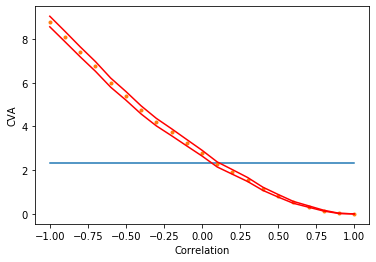

In [25]:
plt.plot(corr_tested, [uncorr_cva]*21)
plt.plot(corr_tested, cva_estimates,'.')
plt.plot(corr_tested, cva_estimates+3*np.array(cva_std),'r')
plt.plot(corr_tested, cva_estimates-3*np.array(cva_std),'r')
plt.xlabel("Correlation")
plt.ylabel("CVA")
plt.show()
